# Visualization of Kappa calculation

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tables
#filename = 'PythonAPI/kappa_debug_log.h5'
#filename2 = "PythonAPI/carla_mpc_curv_log.h5"

filename = 'kappa_debug_log.h5'

ImportError: No module named 'numpy.core._multiarray_umath'

ImportError: numpy.core.multiarray failed to import

In [6]:
def rotmat(angle_rad):
    """
    Computes a 2x2 rotation matrix
    :param angle_rad: Rotation angle in rad
    :return: 2x2 rotation matrix
    """
    c = np.cos(angle_rad)
    s = np.sin(angle_rad)
    return np.array([[c, s],
                     [-s, c]])


def polynomial3(x, p0, p1, p2, p3):
    """
    3th-polynomial function for modeling a street trajectory.
        function: y = p3 * x³ + p2 * x² + p1 * x + p0
    --------
    :param x:
    :param p0, p1, p2, p3:
    :return: y
    """
    return p3 * x ** 3 + p2 * x ** 2 + p1 * x + p0


def polynomial3_prime(x, p1, p2, p3):
    """
    First derivation of 3th-polynomial function for modeling a street trajectory.
        function: y = 3 * p3 * x² + 2 * p2 * x + p01
    --------
    :param x:
    :param p0, p1, p2, p3:
    :return: y
    """
    return 3 * p3 * x ** 2 + 2 * p2 * x + p1


def polynomial3_prime2(x, p2, p3):
    """
    Second derivation of 3th-polynomial function for modeling a street trajectory.
        function: y = 6 * p3 * x + 2 * p2 * x
    --------
    :param x:
    :param p0, p1, p2, p3:
    :return: y
    """
    return 6 * p3 * x + 2 * p2


def func_kappa(x, p_arg):
    """
    Curvature function of a waypoint reference line.
    :param x: longitude value
    :param p_arg: np.array of fitted polynomial factors --> [p0, p1, p2, p3]
    :return: curvature of reference line at point x.
    """
    result = polynomial3_prime2(x, p_arg[2], p_arg[3])
    denominator = 1 + polynomial3_prime(x, p_arg[1], p_arg[2], p_arg[3]) ** 2
    denominator = denominator ** 1.5

    return result / denominator

In [7]:
data = pd.read_hdf(filename, 'kappa_log')
data


ImportError: HDFStore requires PyTables, "No module named 'tables'" problem importing

## Display reference curvature 

In [149]:
def plot_ref_curve(t: float):
    plt.rcParams["figure.figsize"] = (20,10)
    plt.suptitle("Reference Curva at timestamp:" + str(t), fontsize=16)
    curve = data.loc[t]['wp_mat']

    fig, ax = plt.subplots()
    ax.scatter(curve[:,0], curve[:,1])
    ax.plot(curve[:,0], curve[:,1])
    plt.xlabel("X")
    plt.ylabel("Y")

    n = np.linspace(0,curve.shape[0] - 1,curve.shape[0])
    for i, txt in enumerate(n):
        ax.annotate(int(txt), (curve[i,0], curve[i,1]))
    x, y = get_poly_values(t)
    ax.plot(x, y, "--r", label="polynomial")
    plt.legend()
    plt.savefig('reference_curve.pdf') 
    return fig

def plot_ref_curve_orginal(t: float):
    plt.rcParams["figure.figsize"] = (20,10)
    plt.suptitle("Reference Curva at timestamp:" + str(t), fontsize=16)
    curve = data.loc[t]['wp_mat_0']
    
    fig, ax = plt.subplots()
    ax.scatter(curve[:,0], curve[:,1])
    ax.plot(curve[:,0], curve[:,1])
    plt.xlabel("X")
    plt.ylabel("Y")

    n = np.linspace(0,curve.shape[0] - 1,curve.shape[0])

    for i, txt in enumerate(n):
        ax.annotate(int(txt), (curve[i,0], curve[i,1]))
    
    
    plt.savefig('reference_curve0.pdf') 
    return fig

def get_poly_values(t: float):
    p_opt = data.loc[t]['p_opt']
    
    N = 20
    dt = 0.2
    velocity = 80
    factor = 2
    
    sampling_radius = velocity * dt * factor / 3.6
    n = np.linspace(0,sampling_radius* N,N )
    y = polynomial3(n, p_opt[0], p_opt[1], p_opt[2], p_opt[3])
    
    return n, y

def plot_ref_poly(t: float):    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.suptitle("Polynomial Curve at timestamp:" + str(t), fontsize=16)
    
    n, y = get_poly_values(t)
    
    fig, ax = plt.subplots()
    plot = ax.plot(n, y)
    plt.xlabel("X")
    plt.ylabel("Y")
    
    return plot



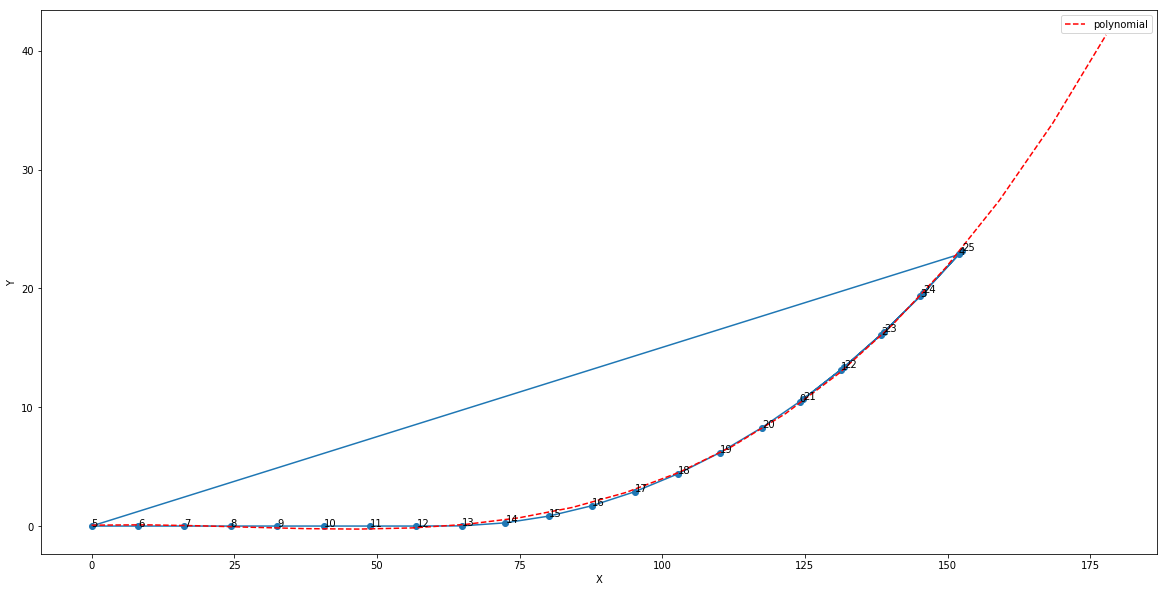

In [150]:
fig = plot_ref_curve(21.20)

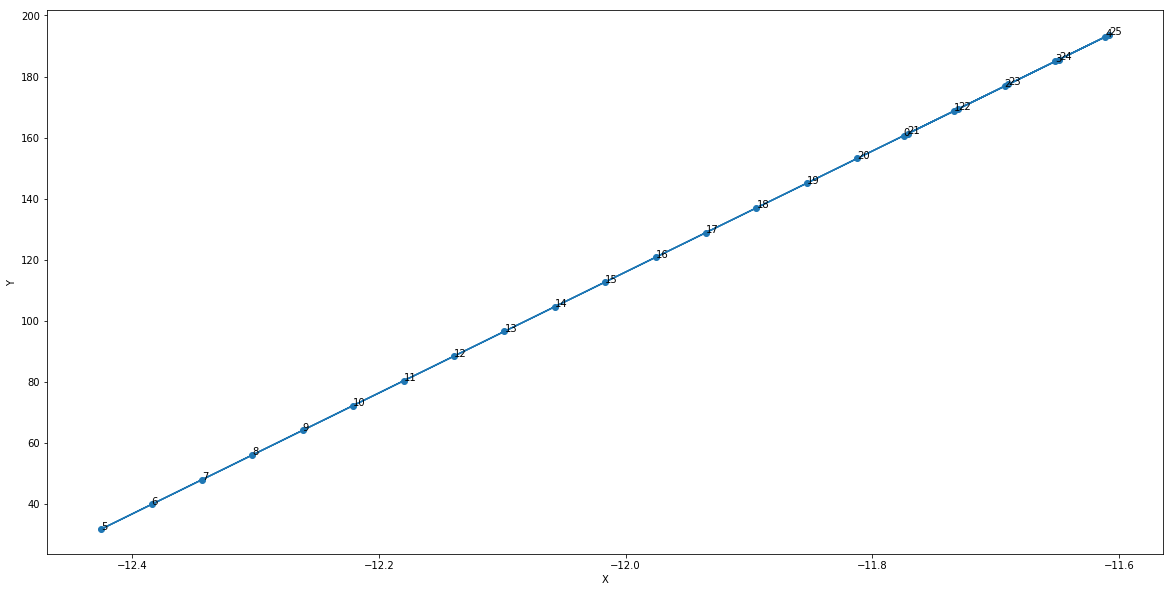

In [132]:
curve = plot_ref_curve_orginal(15.0)

## Checking distance btw wp

In [92]:
next_wp = data.loc[21.20]['wp_mat_0'][6,:]
current_wp = data.loc[21.20]['refernce_point']

print("Next waypoint: ", next_wp)
print("Current waypoint: ", current_wp)

# Sampling radius btw Wp, if vehicle would reach 80
N = 10
dt = 0.2
velocity = 80
factor = 2
sampling_radius = velocity * dt * factor / 3.6

d = current_wp - next_wp 
d = np.sqrt(np.dot(d.T, d))
print('Distance:', d)
print("Original Sampling radius: ", sampling_radius)

Next waypoint:  [-11.75071621 165.32867432]
Current waypoint:  [-11.79174805 157.19761658]
Distance: 8.13116126828327
Original Sampling radius:  8.88888888888889


array([ 5., -3.])